<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 code for part a - f

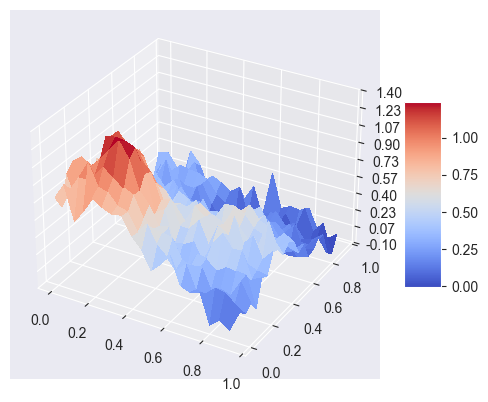

In [3]:
%matplotlib inline
# Precode from the assignment. Added noise to the Franke function
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + 0.1 * np.random.randn(*x.shape) #added noise


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.savefig("figures\a-f\Frankewithnoise.png")
plt.show()

### Part a) : Ordinary Least Square (OLS) on the Franke function

MSE Train: [0.0349433640349068, 0.026783769978449334, 0.01664934564590199, 0.013642799503451871, 0.010522855423522229]
MSE Test: [0.03923735059112901, 0.03603535057872588, 0.024167313385380248, 0.019638791039340752, 0.015268459157982455]
R2 Train: [0.6249206413278117, 0.7125050909149828, 0.8212872154799343, 0.8535592485275258, 0.8870484862387004]
R2 Test: [0.5875691322244643, 0.621225931774821, 0.7459730108895486, 0.7935731259019071, 0.8395104724133508]


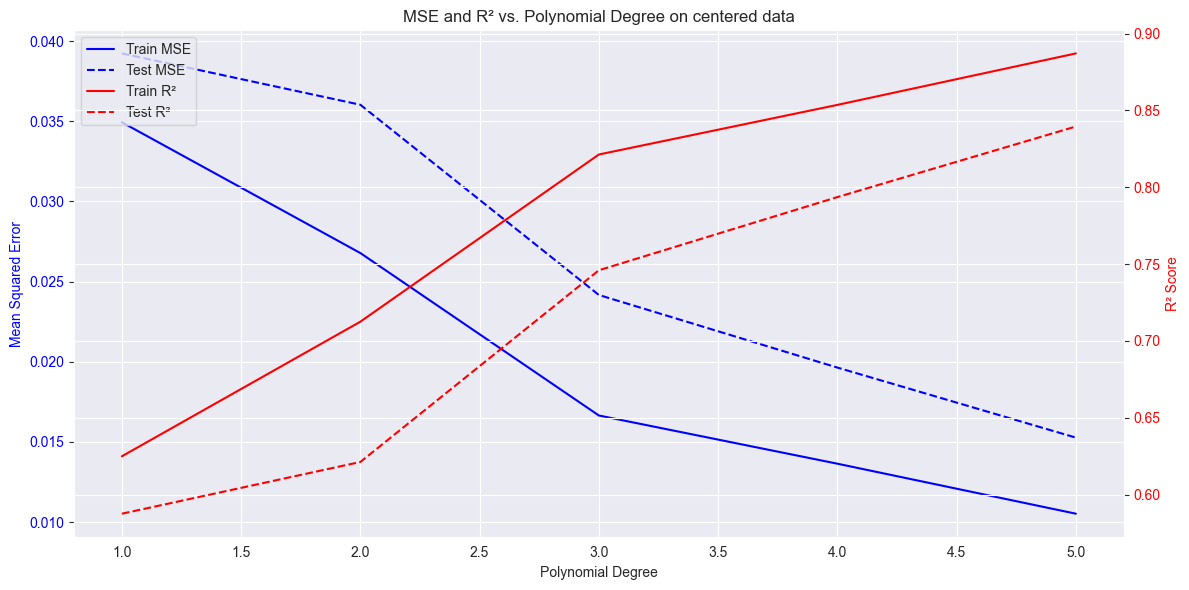

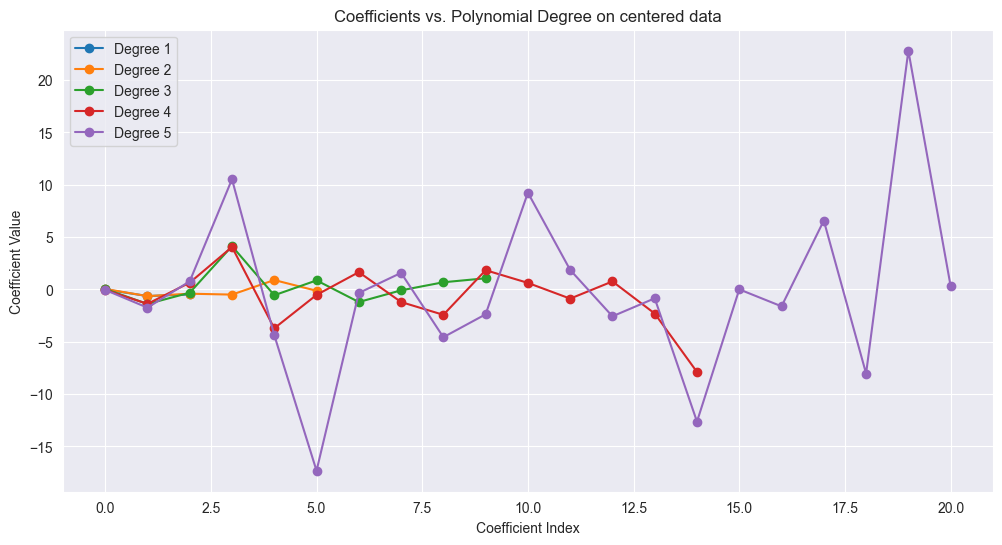

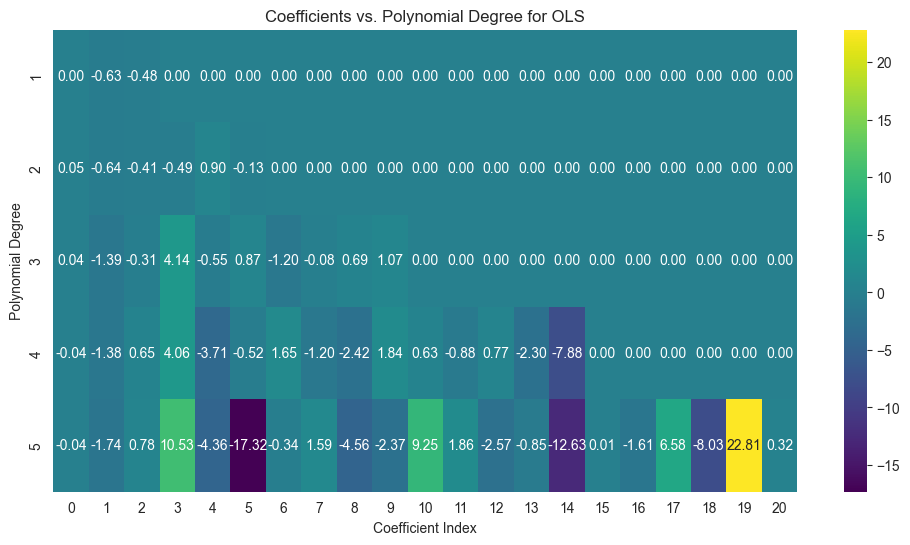

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns

def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-((9 * x - 2) ** 2) / 4.0 - ((9 * y - 2) ** 2) / 4.0)
    term2 = 0.75 * np.exp(-(9 * x + 1) ** 2 / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - ((9 * y - 3) ** 2) / 4.0)
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4 + 0.1 * np.random.randn(*x.shape)  #added noise

# Function to create a design matrix
def create_design_matrix(x, y, degree):
    num_terms = int((degree + 1)*(degree + 2)/2)
    X = np.zeros((len(x), num_terms))
    idx = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            X[:, idx] = (x**i) * (y**j)
            idx += 1
    return X

# Defining MSE and R2 functions 
def MSE(z_data, z_model):
    return np.mean((z_data - z_model)**2)

# The R2 function was taken from Week 35: From Ordinary Linear Regression to Ridge and Lasso Regression, 
# Morten Hjorth-Jensen, Department of Physics, University of Oslo. 
# https://github.com/CompPhysics/MachineLearning/blob/master/doc/LectureNotes/week37.ipynb    
def R2(z_data, z_model):
    return 1 - np.sum((z_data - z_model)**2) / np.sum((z_data - np.mean(z_data))**2)


# Random seed for reproducibility
np.random.seed(315)

# Number of data points
n = 20

# Createing linearly spaced values
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
z = FrankeFunction(X, Y)

# Flatten the arrays
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = z.flatten()

# Split the data into training and testing sets with a 80/20 split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(
    x_flat, y_flat, z_flat, test_size=0.2, random_state=315
)

# Centering the data by subtracting the mean, the values are already scaled between 0 and 1. 
x_mean = np.mean(x_train, axis=0)
y_mean = np.mean(y_train, axis=0)
z_mean = np.mean(z_train, axis=0)

x_train = x_train - x_mean
y_train = y_train - y_mean
z_train = z_train - z_mean

x_test = x_test - x_mean
y_test = y_test - y_mean
z_test = z_test - z_mean

# Perform OLS and plotting MSE and R2 as a function of polynomial degree and the coefficients.
mse_train, mse_test, r2_train, r2_test, coefficients = [], [], [], [], []
degrees = [1,2,3,4,5] #as specified in the assignment
#testmatrix1 = create_design_matrix(x_train, y_train, 3)
#print("design matrix with centering",testmatrix1)

for poly_degree in degrees:
    # Create polynomial features
    XY_train = create_design_matrix(x_train, y_train, poly_degree)
    XY_test = create_design_matrix(x_test, y_test, poly_degree)
    
    # Fit the model with matrix inversion
    beta = inv(XY_train.T @ XY_train) @ XY_train.T @ z_train
    
    # Make predictions on test and training data
    z_train_pred = XY_train @ beta
    z_test_pred = XY_test @ beta
    
    # Append results
    mse_train.append(MSE(z_train, z_train_pred))
    mse_test.append(MSE(z_test, z_test_pred))
    r2_train.append(R2(z_train, z_train_pred))
    r2_test.append(R2(z_test, z_test_pred))
    coefficients.append(beta)

# Print results
    if poly_degree == 5:
        print(f'MSE Train: {mse_train}')
        print(f'MSE Test: {mse_test}')
        print(f'R2 Train: {r2_train}')
        print(f'R2 Test: {r2_test}')


# Plotting MSE and R²
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(degrees, mse_train, 'b-', label='Train MSE')
ax1.plot(degrees, mse_test, 'b--', label='Test MSE')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis for R²
ax2 = ax1.twinx()
ax2.plot(degrees, r2_train, 'r-', label='Train R²')
ax2.plot(degrees, r2_test, 'r--', label='Test R²')
ax2.set_ylabel('R² Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('MSE and R² vs. Polynomial Degree on centered data')
fig.tight_layout()

# Combining legends from both y-axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
#plt.savefig("figures\a-f\MSE_R2_OLSFranke.png")
plt.show()

# Plotting Coefficients as a line plot
plt.figure(figsize=(12, 6))
for i, coef in enumerate(coefficients):
    plt.plot(np.arange(len(coef)), coef.flatten(), 'o-', label=f'Degree {degrees[i]}')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Polynomial Degree on centered data')
plt.legend()
#plt.savefig("figures\a-f\CoeffunscaledOLSFranke.png")
plt.show()

# Convert coefficients to a 2D matrix with padding as required
def pad_coefficients(coefficients):
    max_length = max(len(coef) for coef in coefficients)
    padded_coefficients = np.array([np.pad(coef, (0, max_length - len(coef)), 'constant') for coef in coefficients])
    return padded_coefficients

coefficients_matrix = pad_coefficients(coefficients)

# Plotting Coefficients as Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(coefficients_matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=np.arange(coefficients_matrix.shape[1]), yticklabels=degrees)
plt.xlabel('Coefficient Index')
plt.ylabel('Polynomial Degree')
plt.title('Coefficients vs. Polynomial Degree for OLS')
#plt.savefig("figures\a-f\CoefficientsHeatmapOLS.png")
plt.show()
    

### Part b): Adding Ridge regression for  the Franke function

minimum MSE Train: 0.010560942187232657
minimum MSE Test: 0.015488125285523582
maximum R2 Train: 0.8866396658717737
maximum R2 Test: 0.837201522134145


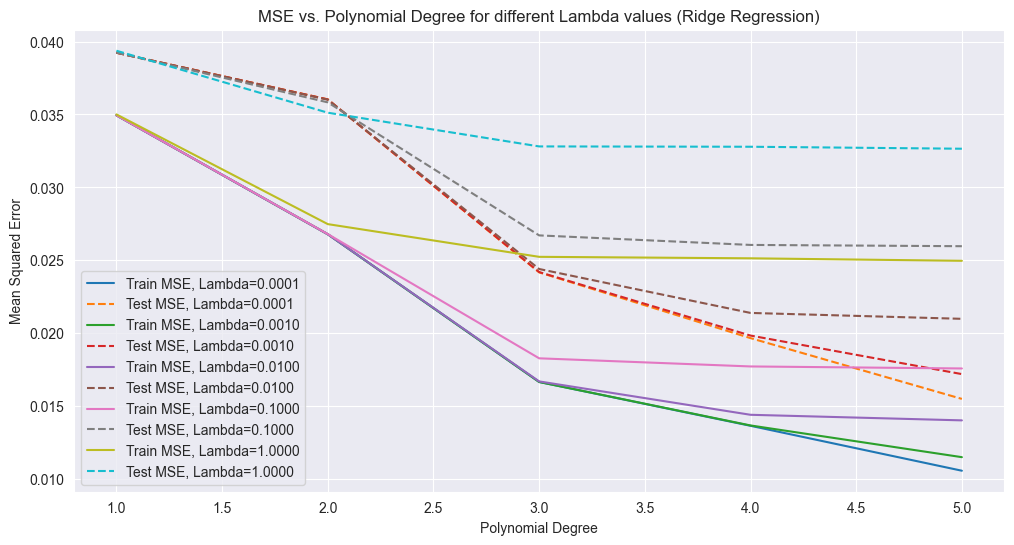

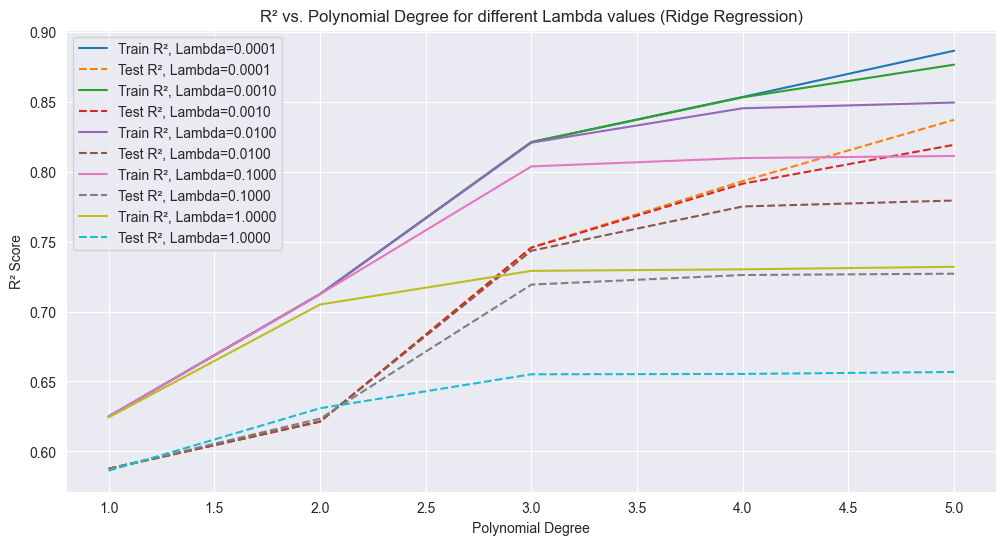

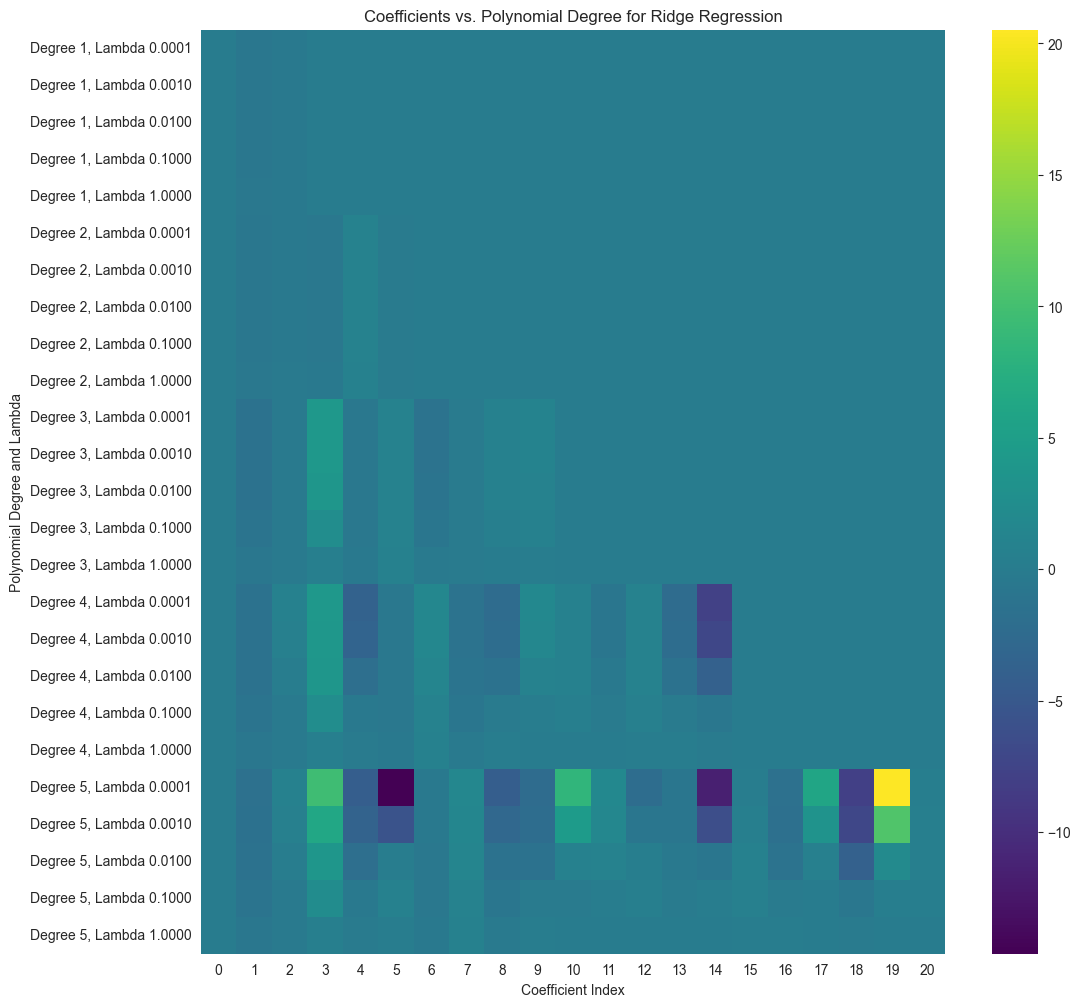

In [5]:
import seaborn as sns

# Ridge Parameters
Maxpolydegree = 5
nlambdas = 5
lambdas = np.logspace(-4, 0, nlambdas)

# Initialize result storage
Error_train_ridge = np.zeros((Maxpolydegree, nlambdas))
Score_train_ridge = np.zeros((Maxpolydegree, nlambdas))
Error_test_ridge = np.zeros((Maxpolydegree, nlambdas))
Score_test_ridge = np.zeros((Maxpolydegree, nlambdas))
num_coefficients = int((Maxpolydegree + 1)*(Maxpolydegree + 2)/2)
betas_ridge = np.zeros((Maxpolydegree, nlambdas, num_coefficients))

#testmatrix2 = create_design_matrix(x_train, y_train, 3)
#print("design matrix without scaling",testmatrix2)

for degree in range(1, Maxpolydegree + 1):
    X_design_train = create_design_matrix(x_train, y_train, degree)
    X_design_test = create_design_matrix(x_test, y_test, degree)
    
    for i, lmbda in enumerate(lambdas):
        beta_ridge = inv(X_design_train.T @ X_design_train + lmbda * np.eye(X_design_train.shape[1])) @ X_design_train.T @ z_train
        z_est_train_ridge = X_design_train @ beta_ridge
        z_est_test_ridge = X_design_test @ beta_ridge
        
        Error_train_ridge[degree-1, i] = MSE(z_train, z_est_train_ridge)
        Score_train_ridge[degree-1, i] = R2(z_train, z_est_train_ridge)
        Error_test_ridge[degree-1, i] = MSE(z_test, z_est_test_ridge)
        Score_test_ridge[degree-1, i] = R2(z_test, z_est_test_ridge)
        
        betas_ridge[degree-1, i, :beta_ridge.shape[0]] = beta_ridge


# Print the best results
print(f'minimum MSE Train: {np.min(Error_train_ridge)}')
print(f'minimum MSE Test: {np.min(Error_test_ridge)}')
print(f'maximum R2 Train: {np.max(Score_train_ridge)}')
print(f'maximum R2 Test: {np.max(Score_test_ridge)}')

# Plotting MSE for Ridge Regression
plt.figure(figsize=(12, 6))
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), Error_train_ridge[:, i], '-', label=f'Train MSE, Lambda={lmbda:.4f}')
    plt.plot(range(1, Maxpolydegree + 1), Error_test_ridge[:, i], '--', label=f'Test MSE, Lambda={lmbda:.4f}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree for different Lambda values (Ridge Regression)')
plt.legend()
#plt.savefig("figures\a-f\MSERidge.png")
plt.show()

# Plotting R² for Ridge Regression
plt.figure(figsize=(12, 6))
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), Score_train_ridge[:, i], '-', label=f'Train R², Lambda={lmbda:.4f}')
    plt.plot(range(1, Maxpolydegree + 1), Score_test_ridge[:, i], '--', label=f'Test R², Lambda={lmbda:.4f}')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs. Polynomial Degree for different Lambda values (Ridge Regression)')
plt.legend()
#plt.savefig("figures\a-f\R2Ridge.png")
plt.show()


# Convert coefficients to a 2D matrix with padding as required
def pad_coefficients(betas_ridge):
    max_length = max(betas_ridge.shape[2], betas_ridge.shape[1])
    padded_coefficients = np.zeros((betas_ridge.shape[0] * betas_ridge.shape[1], max_length))
    for i in range(betas_ridge.shape[0]):
        for j in range(betas_ridge.shape[1]):
            padded_coefficients[i * betas_ridge.shape[1] + j, :betas_ridge.shape[2]] = betas_ridge[i, j, :]
    return padded_coefficients

coefficients_matrix = pad_coefficients(betas_ridge)

# Create yticklabels for the heatmap
yticklabels = [f'Degree {d}, Lambda {l:.4f}' for d in range(1, Maxpolydegree + 1) for l in lambdas]

# Plotting Coefficients as Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(coefficients_matrix, annot=False, fmt=".2f", cmap="viridis", xticklabels=np.arange(coefficients_matrix.shape[1]), yticklabels=yticklabels)
plt.xlabel('Coefficient Index')
plt.ylabel('Polynomial Degree and Lambda')
plt.title('Coefficients vs. Polynomial Degree for Ridge Regression')
#plt.savefig("figures\a-f\CoefficientsHeatmapRidge.png")
plt.show()
# Plotting Coefficients for Ridge Regression
#num_coefficients = betas_ridge.shape[2]
#for i in range(num_coefficients):
    #plt.figure(figsize=(12, 6))
    #for j, lmbda in enumerate(lambdas):
        #plt.plot(range(1, Maxpolydegree + 1), [betas_ridge[deg-1, j, i] for deg in range(1, Maxpolydegree + 1)], 'o-', label=f'Lambda={lmbda:.4f}')
    #plt.xlabel('Polynomial Degree')
    #plt.ylabel(f'Coefficient {i}')
    #plt.title(f'Coefficient {i} vs. Polynomial Degree for different Lambda values (Ridge Regression)')
    #plt.legend()
    #plt.show()

### Part c): Adding Lasso for the Franke function

minimum MSE Train: 0.014906281116339718
minimum MSE Test: 0.022032214434244034
maximum R2 Train: 0.8399971349146904
maximum R2 Test: 0.7684154209895524


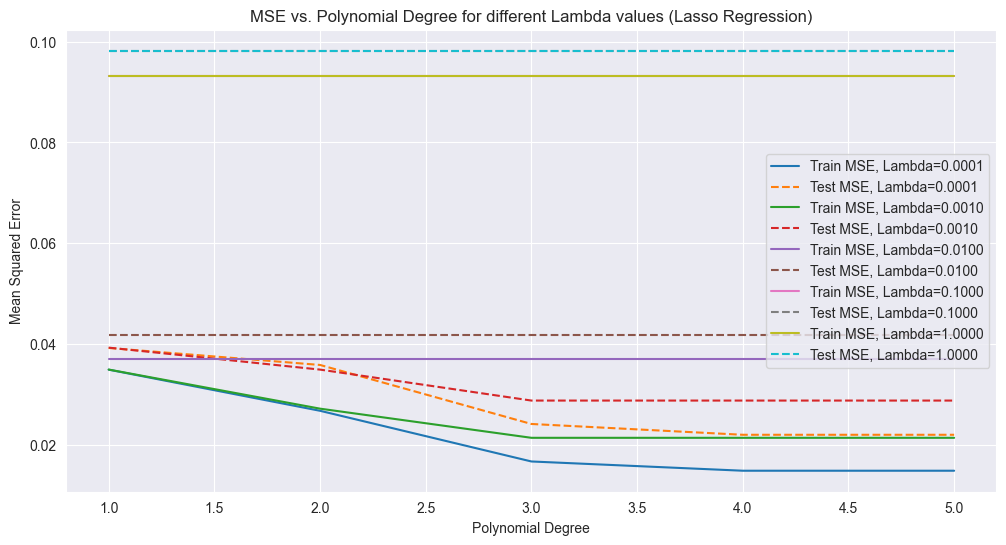

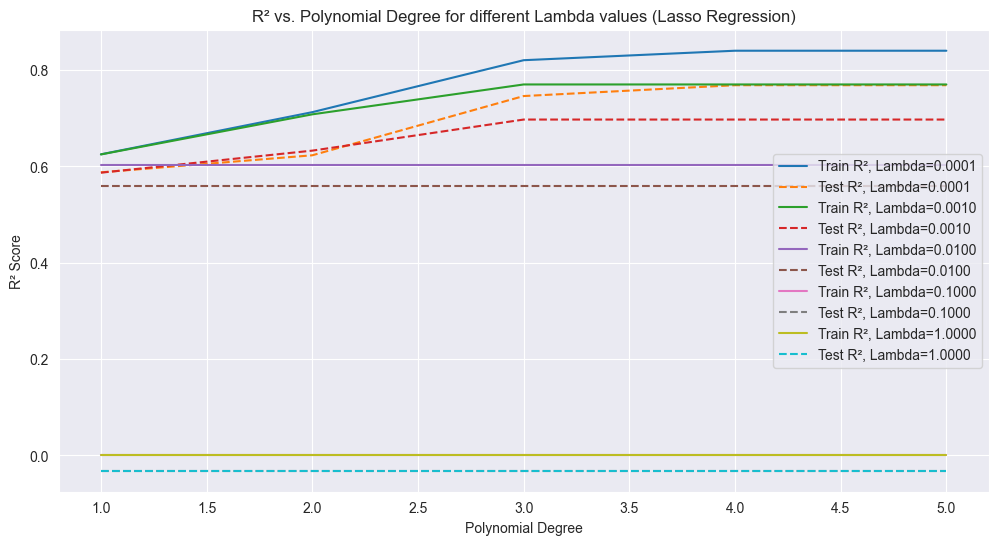

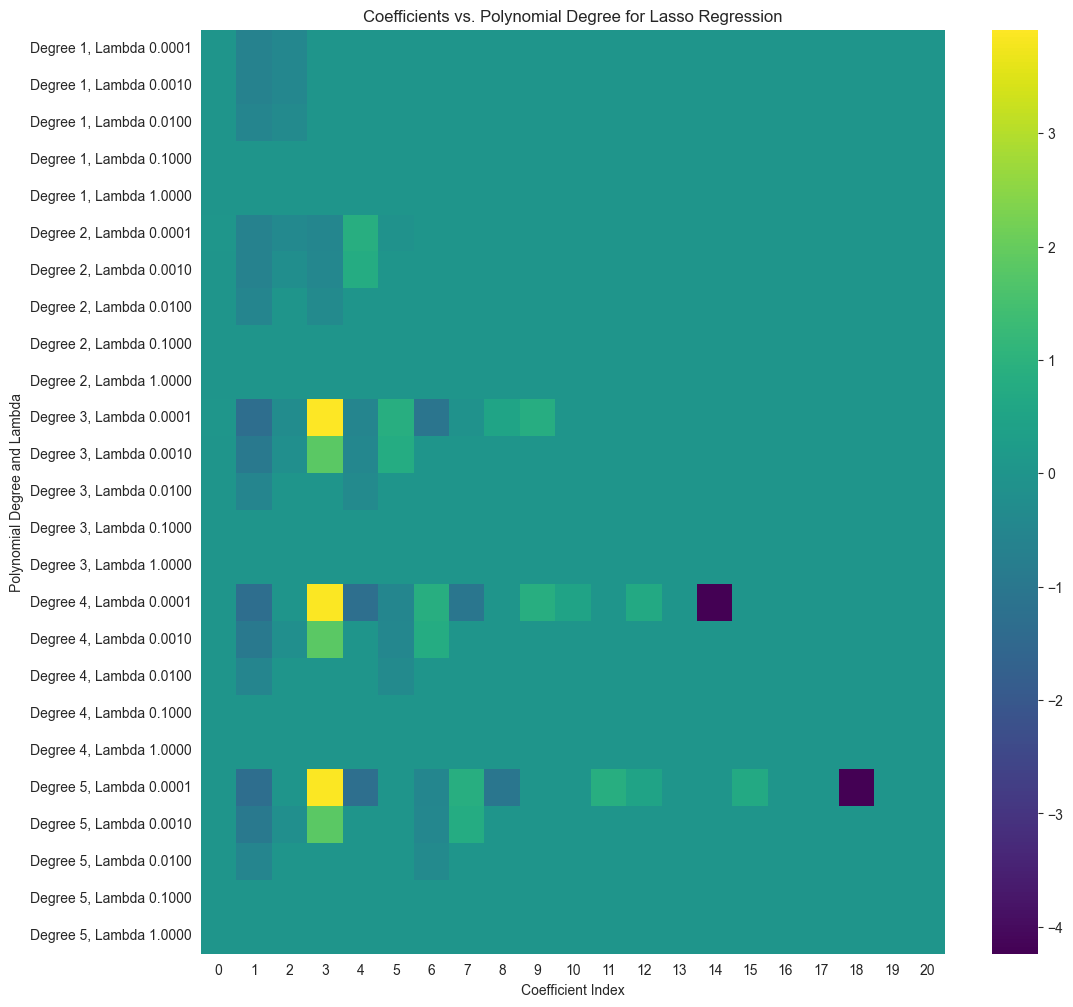

In [6]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Lasso Parameters
Maxpolydegree = 5
nlambdas = 5
lambdas = np.logspace(-4, 0, nlambdas)

# Initialize result storage
Error_train_lasso = np.zeros((Maxpolydegree, nlambdas))
Score_train_lasso = np.zeros((Maxpolydegree, nlambdas))
Error_test_lasso = np.zeros((Maxpolydegree, nlambdas))
Score_test_lasso = np.zeros((Maxpolydegree, nlambdas))

#Creating arrays with length estimated by the maxpolydegree, number of lambdas and number of coefficients 
num_coefficients = int((Maxpolydegree + 1)*(Maxpolydegree + 2)/2)
betas_lasso = np.zeros((Maxpolydegree, nlambdas, num_coefficients))

#testmatrix3 = create_design_matrix(x_train, y_train, 3)
#printing out the design matrix for verification
#print("design matrix without scaling",testmatrix3)

for degree in range(1, Maxpolydegree + 1):
    X_design_train = create_design_matrix(x_train, y_train, degree)
    X_design_test = create_design_matrix(x_test, y_test, degree)

    for i, lmbda in enumerate(lambdas):
        lasso = Lasso(alpha=lmbda, fit_intercept=False, max_iter=10000)
        lasso.fit(X_design_train, z_train)
        beta_lasso = lasso.coef_
        
        z_est_train_lasso = lasso.predict(X_design_train)
        z_est_test_lasso = lasso.predict(X_design_test)
        
        Error_train_lasso[degree-1, i] = MSE(z_train, z_est_train_lasso)
        Score_train_lasso[degree-1, i] = R2(z_train, z_est_train_lasso)
        Error_test_lasso[degree-1, i] = MSE(z_test, z_est_test_lasso)
        Score_test_lasso[degree-1, i] = R2(z_test, z_est_test_lasso)
        
        betas_lasso[degree-1, i, :beta_lasso.shape[0]] = beta_lasso


# Print results best results
print(f'minimum MSE Train: {np.min(Error_train_lasso)}')
print(f'minimum MSE Test: {np.min(Error_test_lasso)}')
print(f'maximum R2 Train: {np.max(Score_train_lasso)}')
print(f'maximum R2 Test: {np.max(Score_test_lasso)}')

# Plotting MSE for Lasso 
plt.figure(figsize=(12, 6))
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), Error_train_lasso[:, i], '-', label=f'Train MSE, Lambda={lmbda:.4f}')
    plt.plot(range(1, Maxpolydegree + 1), Error_test_lasso[:, i], '--', label=f'Test MSE, Lambda={lmbda:.4f}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Polynomial Degree for different Lambda values (Lasso Regression)')
plt.legend()
#plt.savefig("figures\a-f\MSELasso.png")
plt.show()


# Plotting R² for LASSO
plt.figure(figsize=(12, 6))
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), Score_train_lasso[:, i], '-', label=f'Train R², Lambda={lmbda:.4f}')
    plt.plot(range(1, Maxpolydegree + 1), Score_test_lasso[:, i], '--', label=f'Test R², Lambda={lmbda:.4f}')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs. Polynomial Degree for different Lambda values (Lasso Regression)')
plt.legend()
#plt.savefig("figures\a-f\R2Lasso.png")
plt.show()


# Convert coefficients to a 2D matrix with padding as required
def pad_coefficients(betas):
    max_length = betas.shape[2]
    padded_coefficients = np.zeros((betas.shape[0] * betas.shape[1], max_length))
    for i in range(betas.shape[0]):
        for j in range(betas.shape[1]):
            padded_coefficients[i * betas.shape[1] + j, :betas.shape[2]] = betas[i, j, :]
    return padded_coefficients

coefficients_matrix = pad_coefficients(betas_lasso)

# Create yticklabels for the heatmap
yticklabels = [f'Degree {d}, Lambda {l:.4f}' for d in range(1, Maxpolydegree + 1) for l in lambdas]

# Plotting Coefficients as Heatmap for Lasso Regression
plt.figure(figsize=(12, 12))
sns.heatmap(coefficients_matrix, annot=False, fmt=".2f", cmap="viridis", xticklabels=np.arange(coefficients_matrix.shape[1]), yticklabels=yticklabels)
plt.xlabel('Coefficient Index')
plt.ylabel('Polynomial Degree and Lambda')
plt.title('Coefficients vs. Polynomial Degree for Lasso Regression')
#plt.savefig("figures\a-f\CoefficientsHeatmapLasso.png")
plt.show()

# Plotting Coefficients for LASSO
#num_coefficients = betas_lasso.shape[2]
#for i in range(num_coefficients):
    #plt.figure(figsize=(12, 6))
    #for j, lmbda in enumerate(lambdas):
        #plt.plot(range(1, Maxpolydegree + 1), [betas_lasso[deg-1, j, i] for deg in range(1, Maxpolydegree + 1)], 'o-', label=f'Lambda={lmbda:.4f}')
    #plt.xlabel('Polynomial Degree')
    #plt.ylabel(f'Coefficient {i}')
    #plt.title(f'Coefficient {i} vs. Polynomial Degree for different Lambda values (Lasso Regression)')
    #plt.legend()
    #plt.show()


### Part e): Bias-variance trade-off and resampling techniques

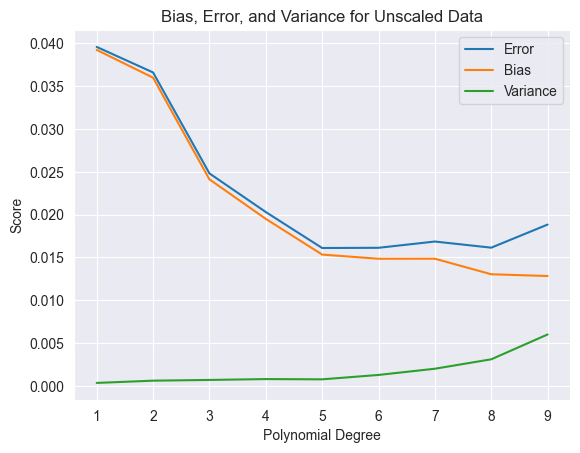

In [7]:
from sklearn.utils import resample

# Bootstrap Parameters
Maxpolydegree = 9
n_boostraps = 100

error = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)
polydegree = np.zeros(Maxpolydegree)

#testmatrix4 = create_design_matrix(x_train, y_train, 3)
#print("design matrix without scaling",testmatrix4)
for degree in range(1, Maxpolydegree + 1):
    z_pred = np.empty((z_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_, z_ = resample(x_train, y_train, z_train)
        design_m = create_design_matrix(x_, y_, degree) 
        beta_m = inv(design_m.T @ design_m) @ design_m.T @ z_
        z_pred[:, i] = create_design_matrix(x_test, y_test, degree) @ beta_m

    polydegree[degree-1] = degree
    error[degree-1] = np.mean((z_test[:, np.newaxis] - z_pred)**2)
    bias[degree-1] = np.mean((z_test[:, np.newaxis] - np.mean(z_pred, axis=1, keepdims=True))**2)
    variance[degree-1] = np.mean(np.var(z_pred, axis=1, keepdims=True))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias')
plt.plot(polydegree, variance, label='Variance')
plt.title("Bias, Error, and Variance for Unscaled Data")
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.legend()
#plt.savefig("figures\a-f\Biasvarbootstrap.png")
plt.show()



### Part f):  Cross-validation as resampling techniques, adding more complexity

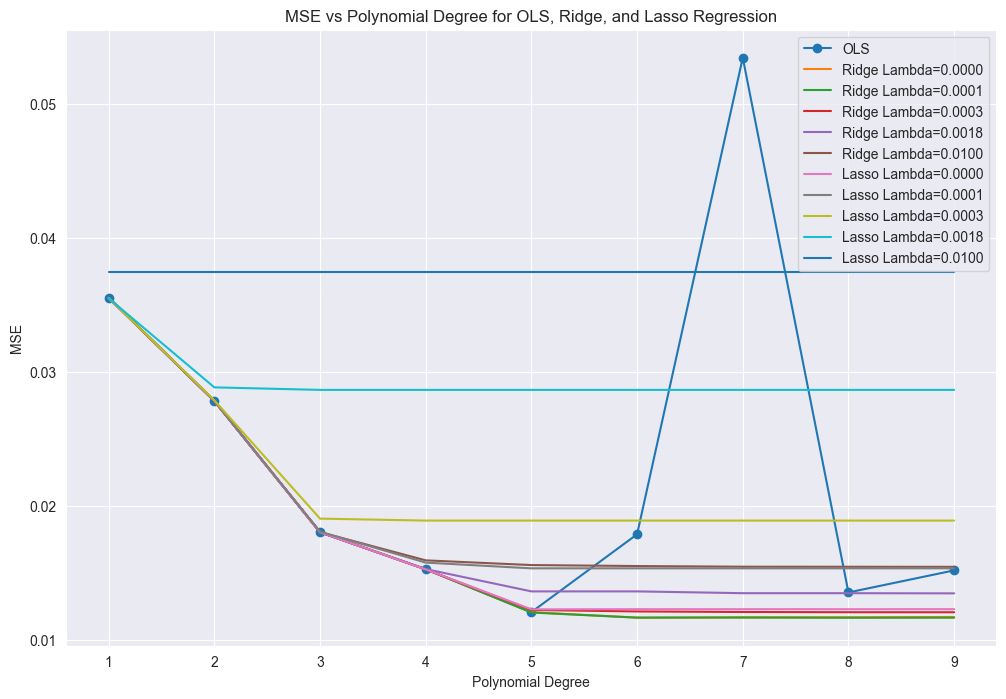

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression

# KFold Parameters
Maxpolydegree = 9
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=315)

# OLS Regression
ols_mse = np.zeros(Maxpolydegree)

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    model = LinearRegression()
    scores = cross_val_score(model, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
    ols_mse[degree-1] = -np.mean(scores)

# Ridge Regression
nlambdas = 5
lambdas = np.logspace(-5, -2, nlambdas)
ridge_mse = np.zeros((Maxpolydegree, nlambdas))

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    for i, lmbda in enumerate(lambdas):
        ridge = Ridge(alpha=lmbda, fit_intercept=False)
        scores = cross_val_score(ridge, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
        ridge_mse[degree-1, i] = -np.mean(scores)

# Lasso Regression
lasso_mse = np.zeros((Maxpolydegree, nlambdas))

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    for i, lmbda in enumerate(lambdas):
        lasso = Lasso(alpha=lmbda, fit_intercept=False, max_iter=10000)
        scores = cross_val_score(lasso, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
        lasso_mse[degree-1, i] = -np.mean(scores)

# Plotting all three MSEs in one plot
plt.figure(figsize=(12, 8))

# OLS MSE plot
plt.plot(range(1, Maxpolydegree + 1), ols_mse, marker='o', label='OLS')

# Ridge MSE plot
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), ridge_mse[:, i], label=f'Ridge Lambda={lmbda:.4f}')

# Lasso MSE plot
for i, lmbda in enumerate(lambdas):
    plt.plot(range(1, Maxpolydegree + 1), lasso_mse[:, i], label=f'Lasso Lambda={lmbda:.4f}')

plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Degree for OLS, Ridge, and Lasso Regression')
plt.legend()
#plt.savefig("figures\a-f\CVoneplotMSEk10.png")
plt.show()


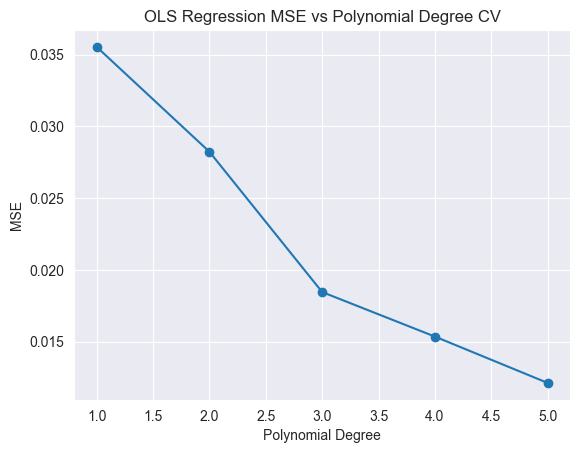

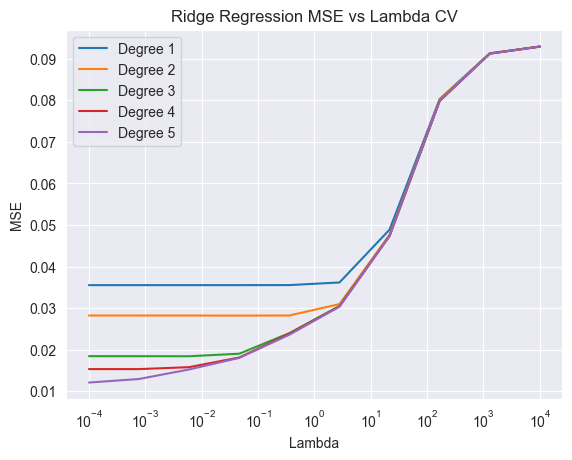

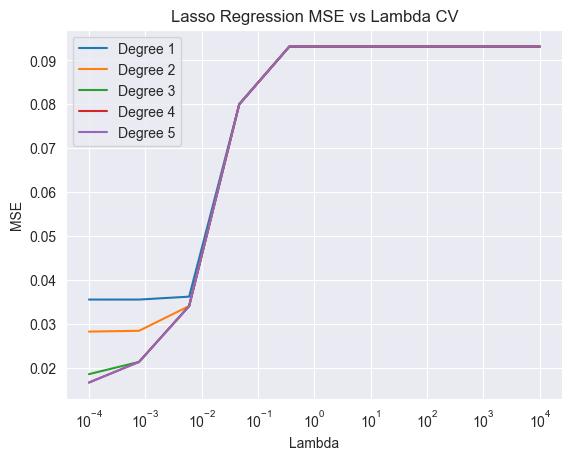

In [9]:
#Another solution to f) that looks at lower k values and polynomial degrees, but broader range of lambdas.T
# Plots the MSE for OLS, Ridge, and Lasso Regression with different polynomial degrees and lambdas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression


# KFold Parameters
Maxpolydegree = 5
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=315)

# OLS Regression
ols_mse = np.zeros(Maxpolydegree)

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    model = LinearRegression()
    z_pred = cross_val_predict(model, X_design_temp, z_train, cv=kfold)
    scores = cross_val_score(model, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
    ols_mse[degree-1] = -np.mean(scores)

plt.figure()
plt.plot(range(1, Maxpolydegree + 1), ols_mse, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('OLS Regression MSE vs Polynomial Degree CV')
#plt.savefig("figures\a-f\CVOLSMSE.png")
plt.show()

# Ridge Regression
nlambdas = 10
lambdas = np.logspace(-4, 4, nlambdas)
estimated_mse_sklearn = np.zeros((Maxpolydegree, nlambdas))

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    for i in range(nlambdas):
        lmbda = lambdas[i]
        ridge = Ridge(alpha=lmbda, fit_intercept=False)
        estimated_mse_folds = cross_val_score(ridge, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_sklearn[degree-1, i] = np.mean(-estimated_mse_folds)

plt.figure()
for degree in range(1, Maxpolydegree + 1):
    plt.plot(lambdas, estimated_mse_sklearn[degree-1], label=f'Degree {degree}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Ridge Regression MSE vs Lambda CV')
#plt.savefig("figures\a-f\CVRidgeMSE.png")
plt.legend()
plt.show()

# Lasso Regression
estimated_mse_sklearn_lasso = np.zeros((Maxpolydegree, nlambdas))

for degree in range(1, Maxpolydegree + 1):
    X_design_temp = create_design_matrix(x_train, y_train, degree)
    for i in range(nlambdas):
        lmbda = lambdas[i]
        lasso = Lasso(alpha=lmbda, fit_intercept=False, max_iter=10000)
        estimated_mse_folds = cross_val_score(lasso, X_design_temp, z_train, scoring='neg_mean_squared_error', cv=kfold)
        estimated_mse_sklearn_lasso[degree-1, i] = np.mean(-estimated_mse_folds)

plt.figure()
for degree in range(1, Maxpolydegree + 1):
    plt.plot(lambdas, estimated_mse_sklearn_lasso[degree-1], label=f'Degree {degree}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Lasso Regression MSE vs Lambda CV')
#plt.savefig("figures\a-f\CVLassoMSE.png")
plt.legend()
plt.show()

### Part g): Look at notebook called partG